In [1]:
import random as rnd
import numpy as np
import statistics as stat
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv

# Simulación de Trayectorias de Caminatas Aleatorias y similares...
## Procesos Estocásticos 2023-2
## Juan Pablo Rodríguez Villagran

Para propósitos de este Notebook, todos los resultados echaran mano del teorema de caracterización visto en clase:<br>
**Teorema.** Sea $k>0$ y $\{U_n=(U_{0,n},...,U_{k,n})\}_{n\geq0}$ una sucesión de vectores aleatorios independientes de una variable aleatoria $X_0$ y $f:\mathbb{R}^{k+1}\to\mathbb{R}$. Para cada $n\geq0$ se definen:
$$X_0=U_{0,0}\qquad\text{y}\qquad X_n=f(X_{n-1},U_n)=f(X_{n-1},U_{0,n},...,U_{k,n}).$$
Entonces la sucesión $\{X_n\}_{n\geq0}$ es una cadena de Markov. Si los vectores aleatorios $\{U_n\}_{n\geq1}$ son idénticamente distribuidos, la cadena es homogénea.<br>
<br>
Sólo como dato cultural, justo por dar una expresión recursiva, a este tipo de cadenas de Markov se les suele llamar *sistemas dinámicos estocásticos*, por la analogía directa con los sistemas dinámicos usuales.

### Caminata Aleatoria
Supongamos que se tiene una partícula que se mueve en $\mathbb{Z}$ y en cada tiempo, se mueve una unidad hacia adelante con probabilidad $p$ o una unidad hacia atrás con probabilidad $q=1-p$, independientemente de la posición y el tiempo. Sea $X_0$ la posición inicial de la partícula y para $n\geq1$, $X_n$ la posición al tiempo $n$.<br>
Sea $\{U_n\}_{n\geq1}$ una sucesión de v.a.i.i.d. tales que
$$\mathbb{P}[U_n=1]=p\quad\text{y}\quad\mathbb{P}[U_n=-1]=1-p$$
y $X_0$ la posición inicial de la partícula, entonces la posición al tiempo $n$, considerando la función $f(x,y)=x+y$ está dado por:
$$X_n=X_{n-1}+U_n=X_0+\sum_{i=1}^nU_i$$

In [2]:
## Primero definimos dónde empieza y las direcciones a dónde puede moverse el caminante, que por la Un que tenemos son 1 y -1:
x0 = 0
Dirs = [-1,1]

## Ahora la probabilidad de avanzar o retroceder, esto es dar la densidad de nuestras U_n:
p = 0.5
Probas = [1-p, p]

In [3]:
## Entonces, generamos N pasos (es decir, las N direcciones que tomará):
N = 200
Pasos = rnd.choices(Dirs,Probas,k=N)

En sí, las direcciones que toma el monito son:<br>
(Notemos que esto son valores de $U_n$, **NO** de $X_n$)

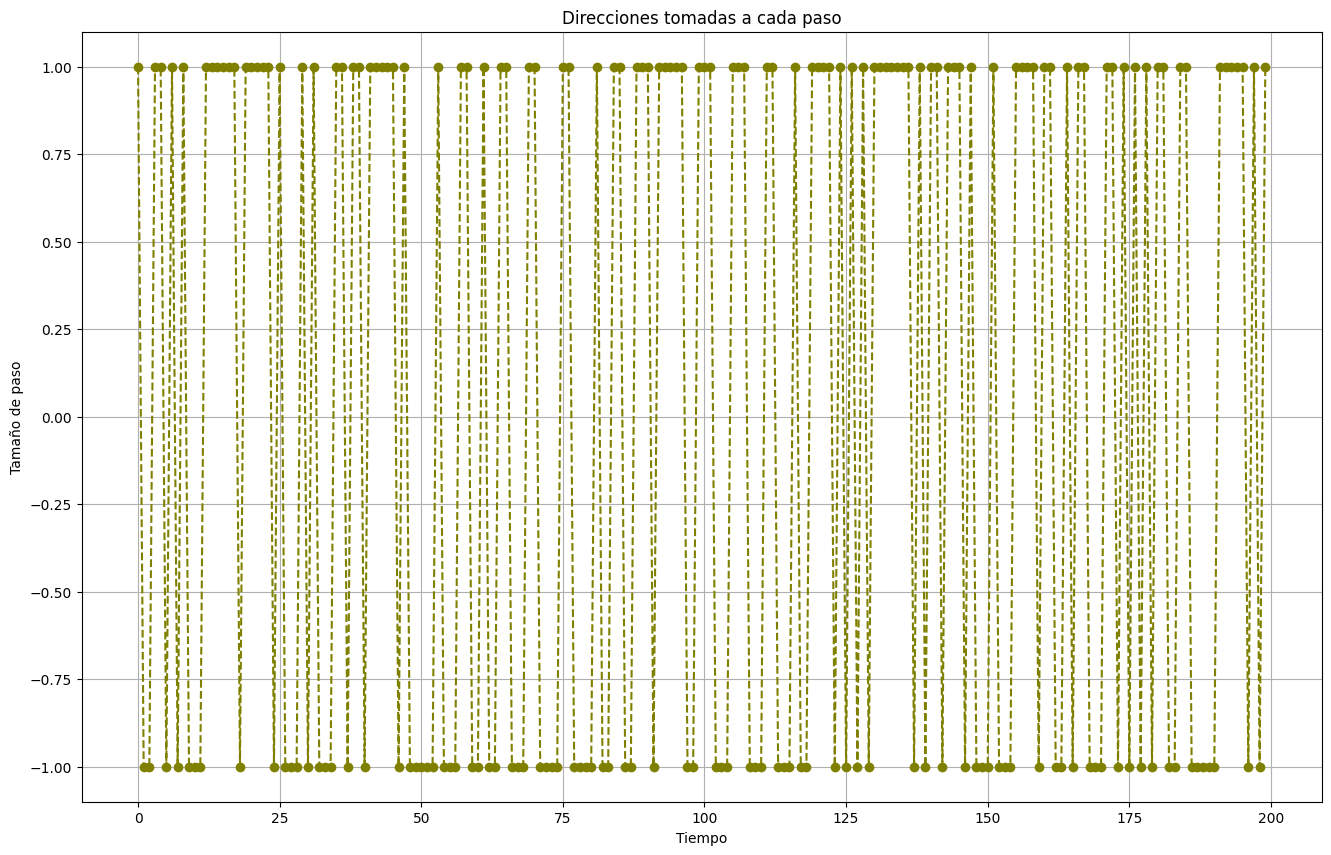

In [4]:
X = range(N)
plt.figure(figsize=[16,10])
#plt.plot(X,Pasos,'bo',color='olive')
plt.plot(X,Pasos,linestyle='--',marker='o',color='olive')
plt.title('Direcciones tomadas a cada paso')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de paso')
plt.grid('on')
plt.show()

Conociendo los pasos que da, con la expresión de $X_n$ como suma de las variables $U_n$, basta *acumular la suma a cada paso* para reconstruir la trayectoria.

In [5]:
## Primero agregamos la posición inicial (inserta el valor de x0 en la entrada 0 del arreglo Pasos):
Pasos.insert(0,x0)

In [6]:
Tray = []

## La función CumulativeSum de Numpy (cumsum pa los compas) lo que hace es devolver un arreglo
## con la suma acumulada a cada entrada, por ejemplo
## np.cumsum([0,7,-3,4,2]) devolvería [0,0+7,7+(-3),7+(-3)+4,7+(-3)+4+2]=[0,7,4,8,10]...

## En esta parte ya calculamos cada subsuma de la expresión de XN
Tray = np.cumsum(Pasos)
#Tray

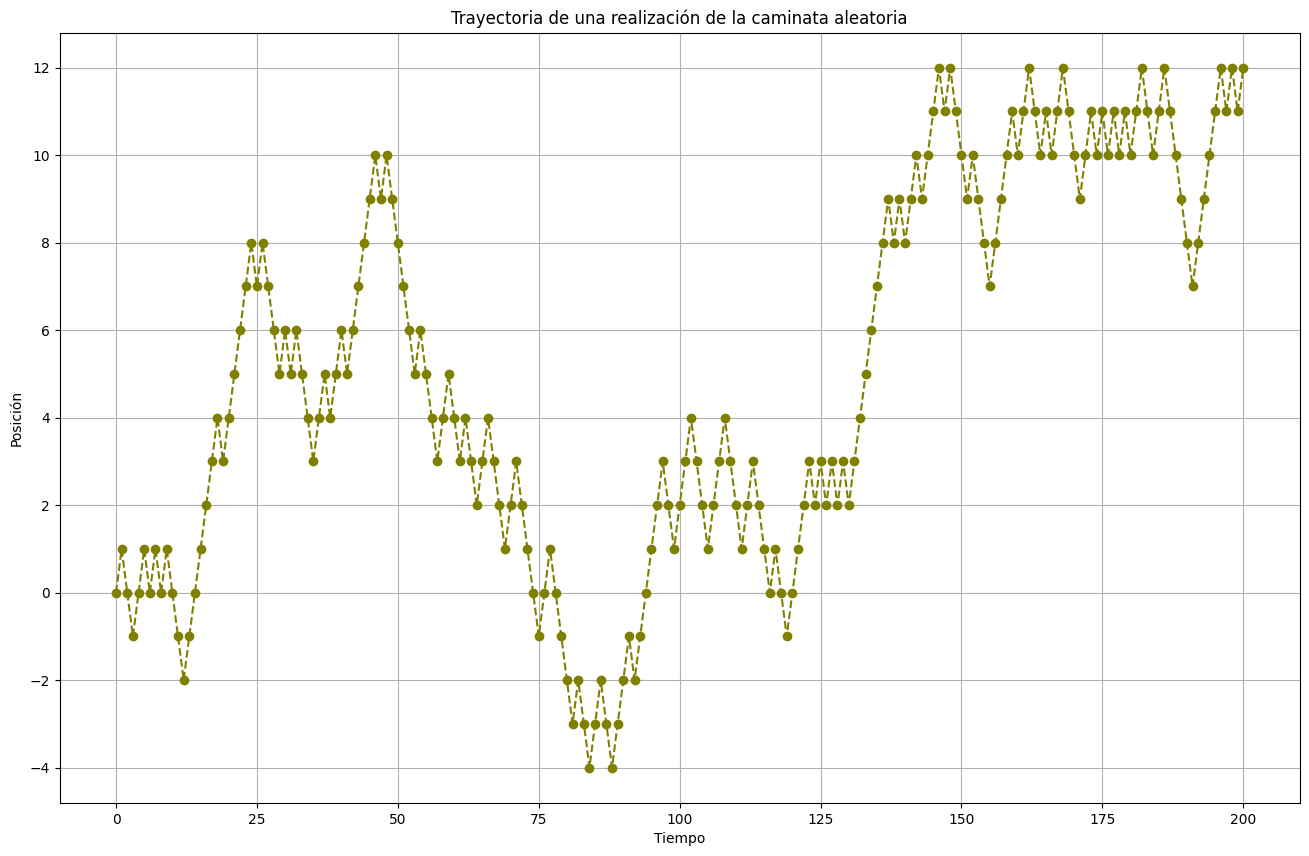

In [7]:
Time = range(N+1)
plt.figure(figsize=[16,10])
plt.plot(Time,Tray,linestyle='--',marker='o',color='olive')
plt.title('Trayectoria de una realización de la caminata aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()

Veamos un par de propiedades interesantes que tiene la caminata aleatoria, para esto, veamos qué pasa con sus primeros dos momentos:
$$\mathbb{E}[X_n]=\mathbb{E}\left[X_0+\sum_{i=1}^nU_n\right]=X_0+\sum_{i=1}^n\mathbb{E}[U_n]$$
donde se utilizó que en general $X_0$ suele ser fijo y ahora, considerando que cada $U_n$ es tal que $\mathbb{E}[U_n]=p-(1-p)=2p-1$, se puede concluir que para este modelo de caminata aleatoria:
$$\mathbb{E}[X_n]=X_0+(2p-1)n$$
##### Obs. Si la caminata es equilibrada, es decir, $p=\frac{1}{2}$, se espera en promedio estar donde empezamos.
Ahora, por hipótesis las variables $U_n$ son, entre otras cosas, *independientes*, sabemos que la varianza de cosas independientes (en particular *no correlacionadas*) abre su suma:
$$\text{Var}(X_n)=\text{Var}\left(X_0+\sum_{i=1}^nU_n\right)=\sum_{i=1}^n\text{Var}(U_n)$$
donde la varianza la podemos calcular utilizando que $\mathbb{E}[U_n^2]=p+(1-p)=1$, así $\text{Var}(U_n)=1-(2p-1)^2=1-4p^2+4p-1=4p(1-p)$, entonces:
$$\text{Var}(X_n)=4p(1-p)n\implies\text{SD}(X_n)=2\sqrt{p(1-p)n}$$

In [8]:
## Ésta es la función que calculamos para la esperanza
def ExpRW(x,p,n):
    return x+(2*p-1)*n

## Ésta es la función que calculamos para la varianza
def VarRW(x0,p,n):
    return 4*p*(1-p)*n

## Ésta es la función que calculamos para la desviación estándar
def StdRW(p,n):
    return 2*np.sqrt(p*(1-p)*n)

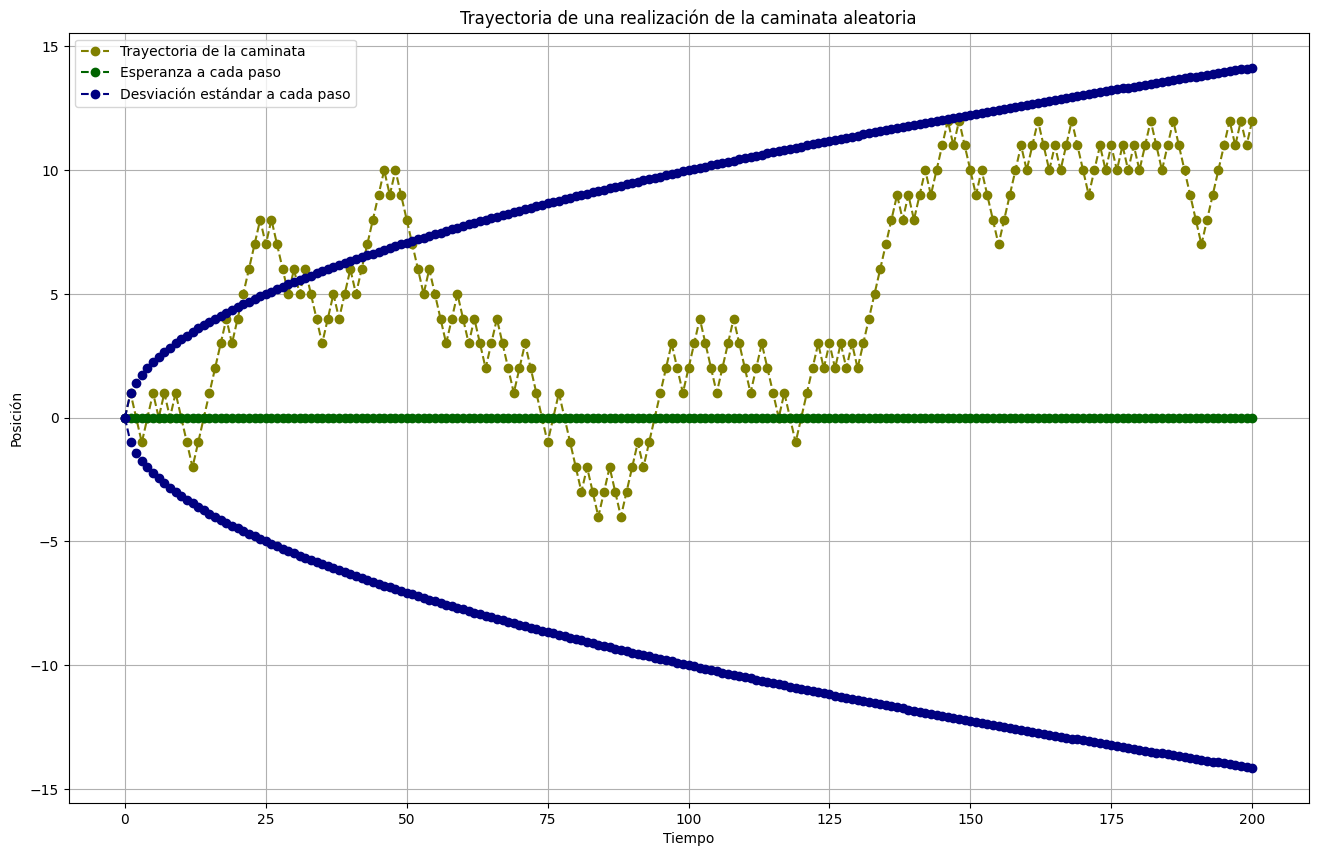

In [9]:
Time = range(N+1)
Exps = [ExpRW(x0,p,t) for t in Time]
Stds = [StdRW(p,t) for t in Time]
NStds = [-x for x in Stds]

plt.figure(figsize=[16,10])
plt.plot(Time,Tray,linestyle='--',marker='o',color='olive',label='Trayectoria de la caminata')
plt.plot(Time,Exps,linestyle='--',marker='o',color='darkgreen',label='Esperanza a cada paso')
plt.plot(Time,Stds,linestyle='--',marker='o',color='navy',label='Desviación estándar a cada paso')
plt.plot(Time,NStds,linestyle='--',marker='o',color='navy')
plt.title('Trayectoria de una realización de la caminata aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.legend()
plt.show()

Esto es bastante más interesante si vemos varias caminatas al mismo tiempo, así que repetimos todo lo anterior y graficamos simultáneamente todas las caminatas.

In [10]:
## Definimos cuántas caminatas queremos
numcamins = 30
caminatas = []

for _ in range(numcamins):
    Steps = rnd.choices(Dirs,Probas,k=N)
    Steps.insert(0,x0)
    caminatas.append(np.cumsum(Steps))

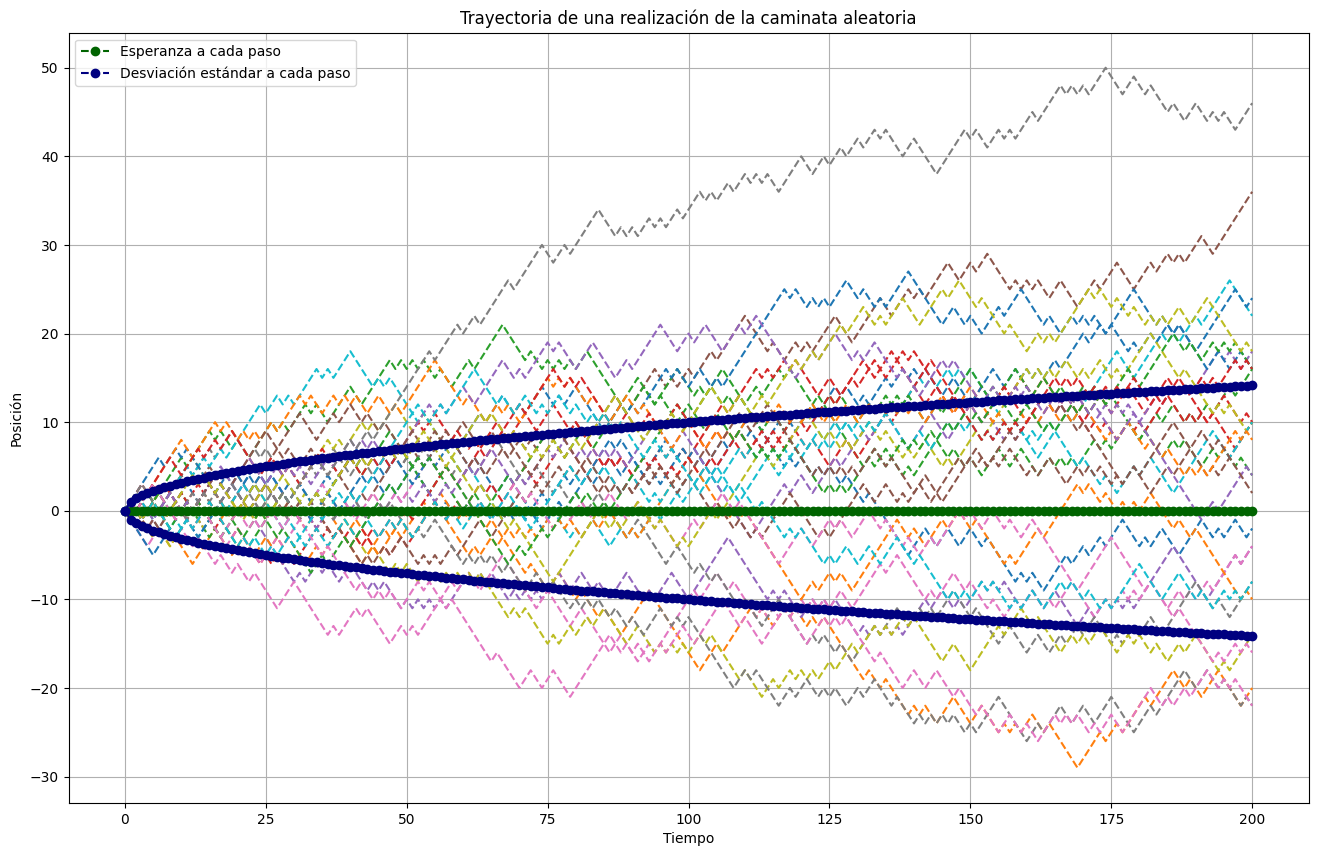

In [11]:
Time = range(N+1)
Exps = [ExpRW(x0,p,t) for t in Time]
Stds = [StdRW(p,t) for t in Time]
NStds = [-x for x in Stds]

plt.figure(figsize=[16,10])
plt.plot(Time,np.transpose(caminatas),linestyle='--')
plt.plot(Time,Exps,linestyle='--',marker='o',color='darkgreen',label='Esperanza a cada paso')
plt.plot(Time,Stds,linestyle='--',marker='o',color='navy',label='Desviación estándar a cada paso')
plt.plot(Time,NStds,linestyle='--',marker='o',color='navy')
plt.title('Trayectoria de una realización de la caminata aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.legend()
plt.show()

Se puede probar que la varianza se maximiza para $p=\frac{1}{2}$. Quizás para una $p$ distinta, la parábola de la desviación estándar no se ajuste bonito a los datos en la gráfica sin algún truco geométrico, pero si uno lo ve, puede notar que la amplitud de la caminata está super bien modulada por ésta.

### Cadena de Nacimiento y Muerte
Supongamos que se tiene una partícula que se mueve en $\mathbb{Z}$ y en cada tiempo: se desplaza una unidad hacia adelante con probabilidad $p$, se queda en su lugar con probabilidad $r$ o una unidad hacia atrás con probabilidad $q$ ($p+q+r=1$), independientemente de la posición y el tiempo. Sean $X_0$ la posición inicial de la partícula y $X_n$ la posición al tiempo $n\geq1$.<br>
Notemos que el proceso es una cadena de Markov por el Teoremón, definiendo $f:\mathbb{R}^2\to\mathbb{R}$ como en la caminata aleatoria pero ahora con una colección de v.a.i.i.d. definida por la densidad para cada $n\geq1$:
$$\mathbb{P}[U_n=-1]=q,\quad\mathbb{P}[U_n=0]=r\quad\text{y}\quad\mathbb{P}[U_n=1]=p$$
Así, tenemos también una expresión explícita para $X_n$ en términos de las $U_n$:
$$X_n=X_0+\sum_{i=1}^nU_i$$

In [12]:
## Primero definimos dónde empieza y las direcciones a dónde puede moverse el caminante:
x0 = 0
Dirs = [-1,0,1]

## Ahora la probabilidad de avanzar o retroceder, esto es definir a nuestras U_n:
p = 1/3
q = 1/3
r = 1/3
Probas = [q,r,p]

In [13]:
## Entonces, generamos N pasos (es decir, las N direcciones que tomará):
N = 200
Pasos = rnd.choices(Dirs,Probas,k=N)

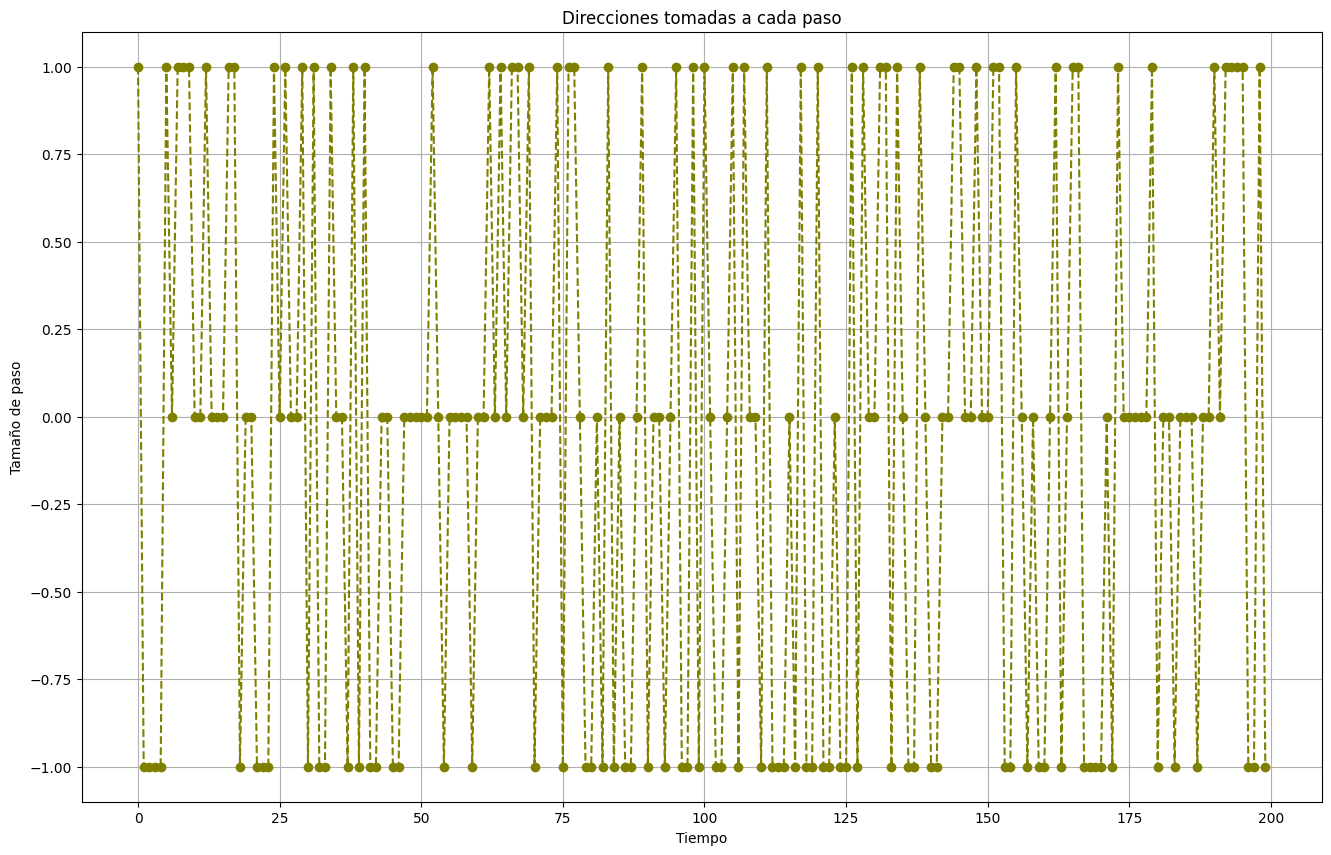

In [14]:
X = range(N)
plt.figure(figsize=[16,10])
#plt.plot(X,Pasos,'bo',color='olive')
plt.plot(X,Pasos,linestyle='--',marker='o',color='olive')
plt.title('Direcciones tomadas a cada paso')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de paso')
plt.grid('on')
plt.show()

In [15]:
## Primero agregamos la posición inicial:
Pasos.insert(0,x0)

In [16]:
Tray = []

## La función CumulativeSum de Numpy (cumsum pa los compas) lo que hace es devolver un arreglo
## con la suma acumulada a cada entrada, por ejemplo
## np.cumsum([0,7,-3,4,2]) devolvería [0,0+7,7+(-3),7+(-3)+4,7+(-3)+4+2]=[0,7,4,8,10]...

## En esta parte ya calculamos cada subsuma de la expresión de XN
Tray = np.cumsum(Pasos)
#Tray

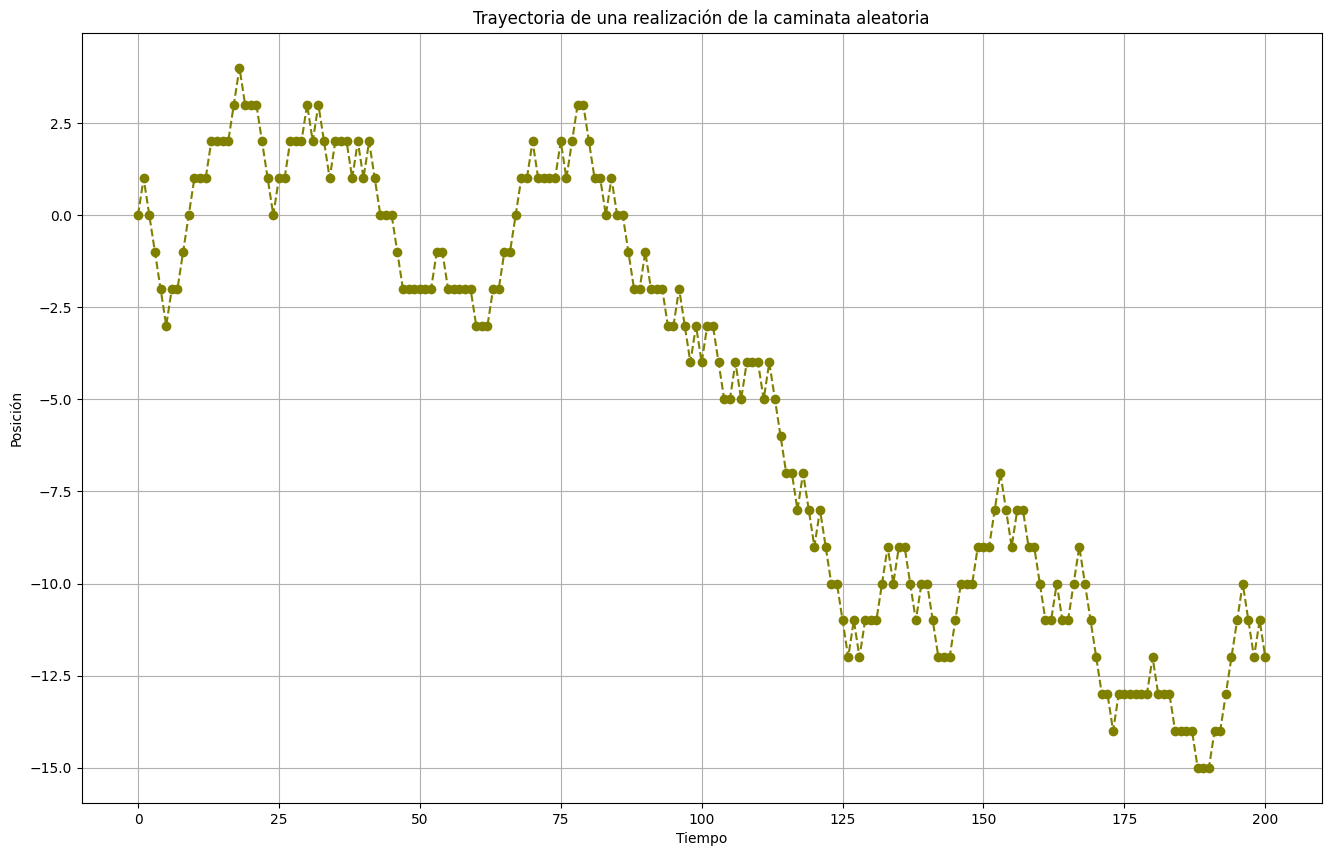

In [17]:
Time = range(N+1)
plt.figure(figsize=[16,10])
plt.plot(Time,Tray,linestyle='--',marker='o',color='olive')
plt.title('Trayectoria de una realización de la caminata aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()

Veamos un par de propiedades interesantes que tiene el proceso de nacimiento y muerte, para esto, veamos qué pasa con sus primeros dos momentos:
$$\mathbb{E}[X_n]=\mathbb{E}\left[X_0+\sum_{i=1}^nU_n\right]=X_0+\sum_{i=1}^n\mathbb{E}[U_n]$$
donde se utilizó que en general $X_0$ suele ser fijo y ahora, considerando que cada $U_n$ es tal que $\mathbb{E}[U_n]=p-q$, se puede concluir que para este modelo de caminata aleatoria:
$$\mathbb{E}[X_n]=X_0+(p-q)n$$
##### Obs. Si el proceso es equilibrada, es decir, $p=\frac{1}{3}$, se espera en promedio estar donde empezamos.
Ahora, por hipótesis las variables $U_n$ son, entre otras cosas, *independientes*, sabemos que la varianza de cosas independientes (en particular *no correlacionadas*) abre su suma:
$$\text{Var}(X_n)=\text{Var}\left(X_0+\sum_{i=1}^nU_n\right)=\sum_{i=1}^n\text{Var}(U_n)$$
donde la varianza la podemos calcular utilizando que $\mathbb{E}[U_n^2]=p+q$, así $\text{Var}(U_n)=(p+q)-(p-q)^2$, entonces:
$$\text{Var}(X_n)=[(p+q)-(p-q)^2]n\implies\text{SD}(X_n)=\sqrt{[(p+q)-(p-q)^2]n}$$

In [18]:
def ExpBD(x,p,q,r,n):
    return x+(p-q)*n

def VarBD(p,q,r,n):
    return ((p+q)-(p-q)**2)*n

def StdBD(p,q,r,n):
    return np.sqrt(((p+q)-(p-q)**2)*n)

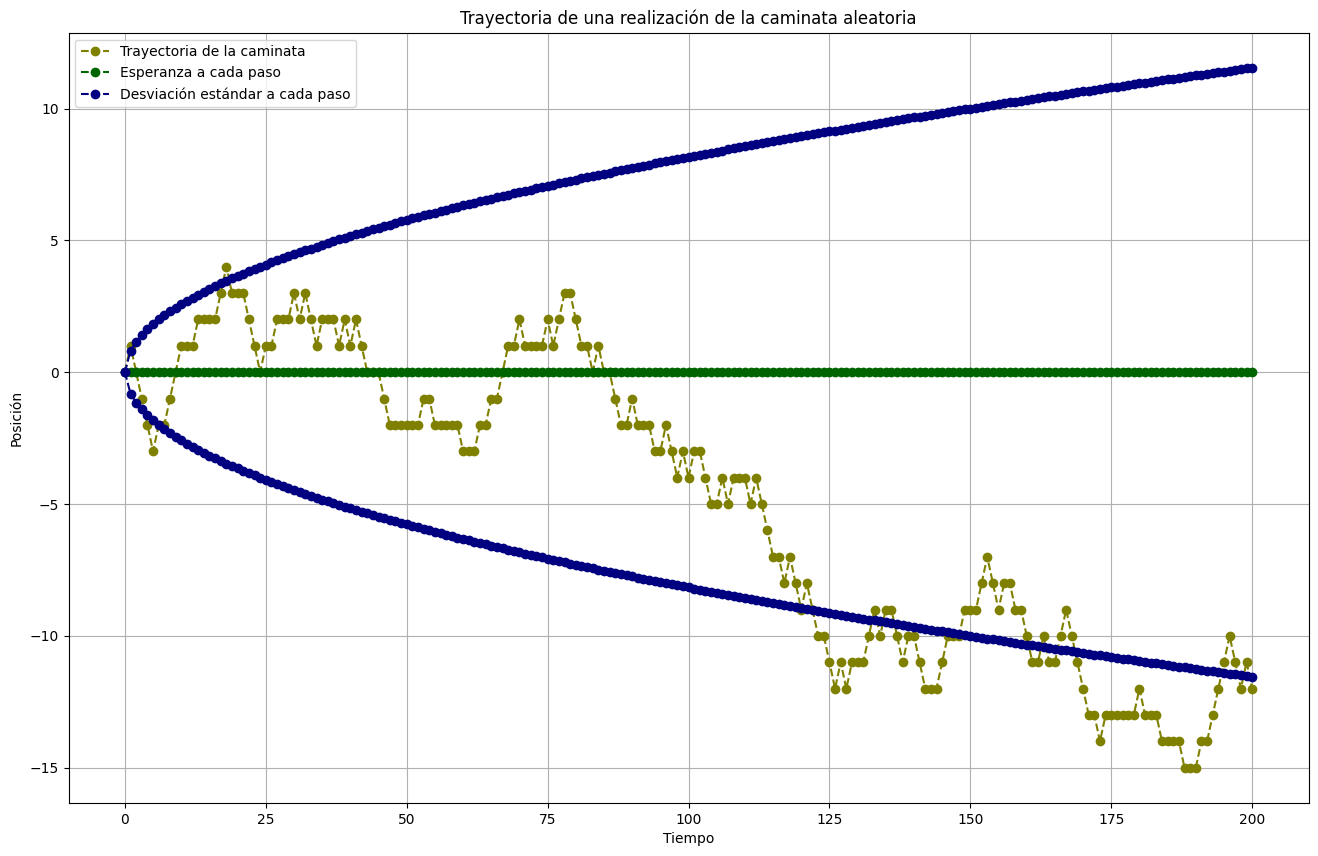

In [19]:
Time = range(N+1)
Exps = [ExpBD(x0,p,q,r,t) for t in Time]
Stds = [StdBD(p,q,r,t) for t in Time]
NStds = [-x for x in Stds]

plt.figure(figsize=[16,10])
plt.plot(Time,Tray,linestyle='--',marker='o',color='olive',label='Trayectoria de la caminata')
plt.plot(Time,Exps,linestyle='--',marker='o',color='darkgreen',label='Esperanza a cada paso')
plt.plot(Time,Stds,linestyle='--',marker='o',color='navy',label='Desviación estándar a cada paso')
plt.plot(Time,NStds,linestyle='--',marker='o',color='navy')
plt.title('Trayectoria de una realización de la caminata aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.legend()
plt.show()

In [20]:
## Definimos cuántas realizaciones queremos
numcamins = 30
realizaciones = []

for _ in range(numcamins):
    Steps = rnd.choices(Dirs,Probas,k=N)
    Steps.insert(0,x0)
    realizaciones.append(np.cumsum(Steps))

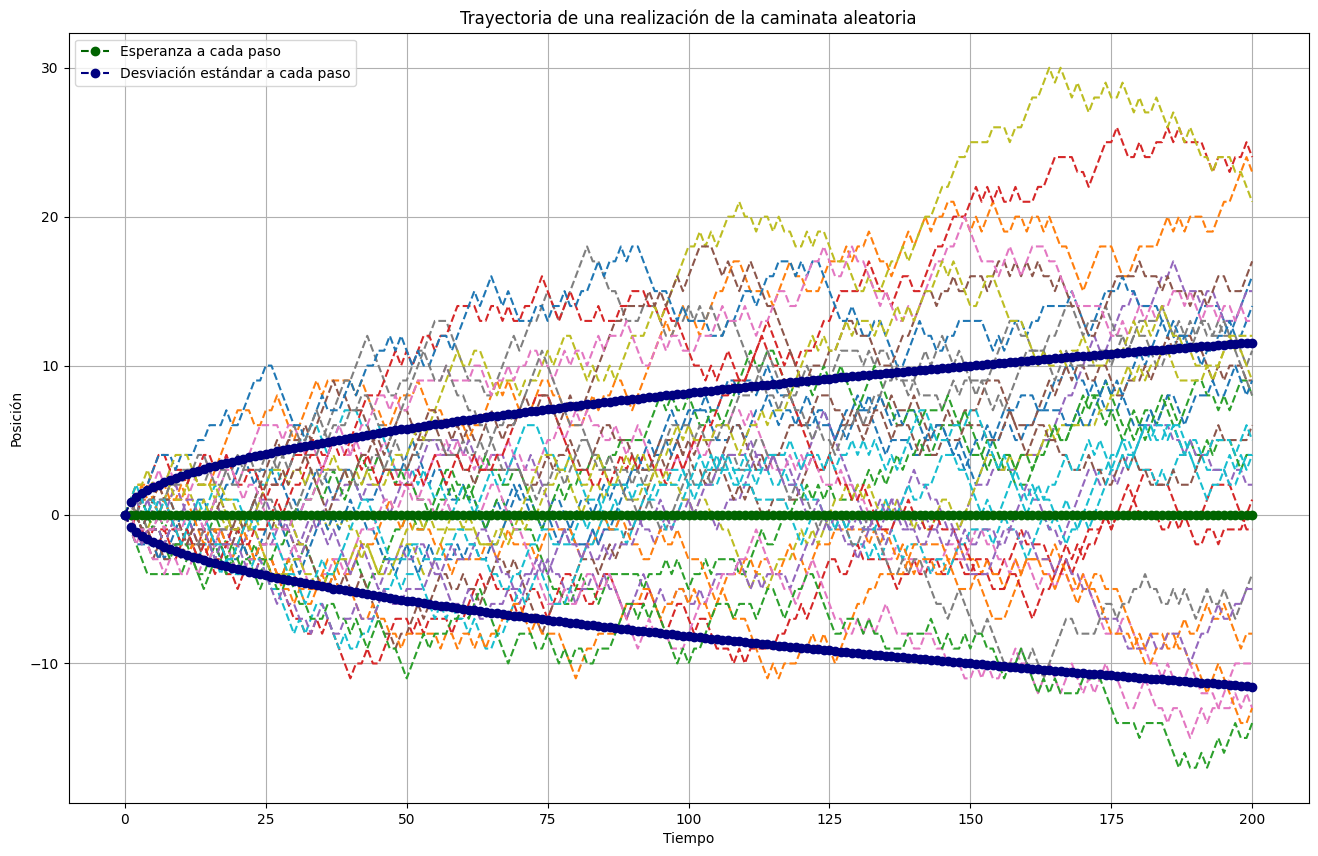

In [21]:
Time = range(N+1)
Exps = [ExpBD(x0,p,q,r,t) for t in Time]
Stds = [StdBD(p,q,r,t) for t in Time]
NStds = [-x for x in Stds]

plt.figure(figsize=[16,10])
plt.plot(Time,np.transpose(realizaciones),linestyle='--')
plt.plot(Time,Exps,linestyle='--',marker='o',color='darkgreen',label='Esperanza a cada paso')
plt.plot(Time,Stds,linestyle='--',marker='o',color='navy',label='Desviación estándar a cada paso')
plt.plot(Time,NStds,linestyle='--',marker='o',color='navy')
plt.title('Trayectoria de una realización de la caminata aleatoria')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.legend()
plt.show()

### Cadena de Rachas
Consideremos una sucesión $\{U_n\}_{n\geq1}$ de v.a.i.i.d. $Ber(p)$. Para cada $n\geq1$ sea:
$$X_n=\begin{cases}
X_{n-1}+U_n, & U_n=1\\
U_n, & U_n=0
\end{cases}$$
Este caso no es tan sencillo como los dos anteriores, aquí no es suficiente hacer la suma tal cual. Con este ejemplo podemos ahora sí aprovechar bien bien la función $f$ del Teorema de caracterización visto.

In [22]:
## Definimos nuestra función de enlace
def Streak(x,y):
    if y>0:
        return x+y
    elif y==0:
        return y

In [23]:
## Definimos nuestra variable Bernoulli
Sup = [0,1]

## Ahora la probabilidad de avanzar o retroceder, esto es definir a nuestras U_n:
p = 0.5
Probas = [1-p, p]

#rnd.choices(Sup,Probas)

In [24]:
## Definimos cuántas veces se llevará a cabo el juego:
N = 50

## Definimos el arreglo en el que se guardará la longitud de la racha a cada tiempo
## Consideramos que partimos del 0
Rach = [0]

In [25]:
for x in np.arange(N+1):
    A = rnd.choices(Sup,Probas)
    Rach.append(Streak(Rach[x],A[0]))
#Rach

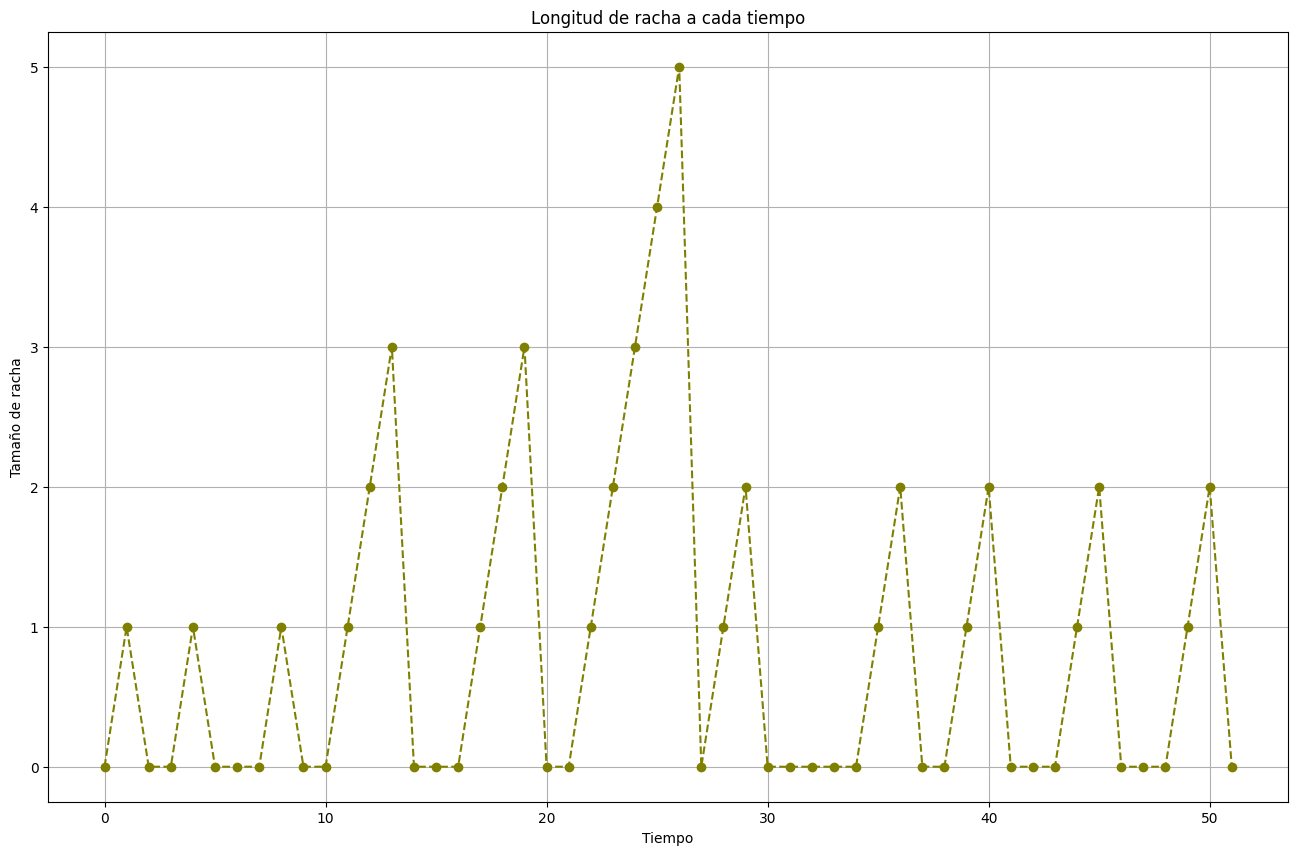

In [26]:
Time = np.arange(len(Rach))
plt.figure(figsize=[16,10])
plt.plot(Time,Rach,linestyle='--',marker='o',color='olive')
plt.title('Longitud de racha a cada tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de racha')
plt.grid('on')
plt.show()

### Caminatas aleatorias especiales...
#### Caminata aleatoria con barreras absorbentes.
Aquí la partícula se mueve en $\{0,1,...,N\}$, una vez llega a 0 o a $N$ ahí se queda. En este caso usamos como función de enlace:
$$f(x,y)=\begin{cases}
x+y, & 1\leq x\leq N-1\\
0, & x=0\\
N, & x=N
\end{cases}$$

In [27]:
## Definimos nuestra función de enlace y nuestra barrera
k = 10

def Absorbente(x,y):
    if x>0 and x<k:
        return x+y
    elif x==0:
        return 0
    elif x==k:
        return k

In [28]:
## Primero definimos dónde empieza y las direcciones a dónde puede moverse el caminante:
x0 = 5
Dirs = [-1,1]

## Ahora la probabilidad de avanzar o retroceder, esto es definir a nuestras U_n:
p = 0.5
Probas = [1-p, p]

In [29]:
## Definimos cuántas veces se llevará a cabo el juego:
N = 50

## Definimos el arreglo en el que se guardará la longitud de la racha a cada tiempo
## Consideramos que partimos del 0
CamAbs = [x0]

In [30]:
for x in np.arange(N+1):
    A = rnd.choices(Dirs,Probas)
    CamAbs.append(Absorbente(CamAbs[x],A[0]))
#Rach

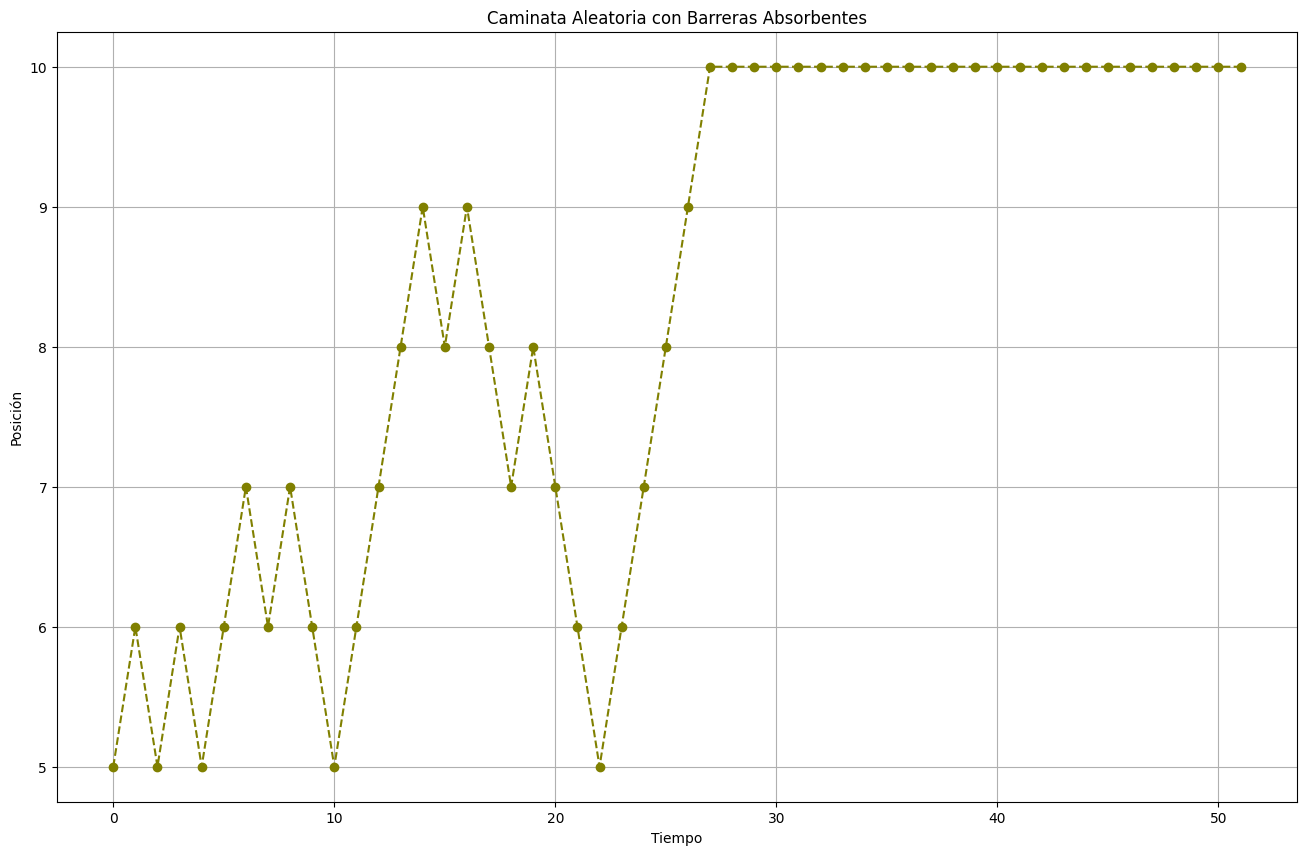

In [32]:
Time = np.arange(len(CamAbs))
plt.figure(figsize=[16,10])
plt.plot(Time,CamAbs,linestyle='--',marker='o',color='olive')
plt.title('Caminata Aleatoria con Barreras Absorbentes')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.grid('on')
plt.show()